# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [1]:
#Setting up some imports

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [2]:
data = pd.read_csv("progresa_sample.csv")

In [3]:
#Find the columns having non-numerical data 
print(data.select_dtypes(include='object').columns)
print()

#unique values of poor column
print(data.poor.value_counts())
print()

#unique values of progresa column
print(data.progresa.value_counts())
print()

#Converting non-numerical column to zero and ones
data.loc[data.poor=="pobre","poor"] = 1
data.loc[data.poor=="no pobre","poor"] = 0

data.loc[data.progresa=="basal","progresa"] = 1
data.loc[data.progresa=="0","progresa"] = 0

# Dropping the NA's as mentioned on Piazza
data_1 = data.dropna()

#Required summary statistic table
summary_table = (data_1.describe().T)[['mean','std']].sort_index().drop(['year','folnum','village'])
summary_table

Index(['poor', 'progresa'], dtype='object')

pobre       65392
no pobre    11858
Name: poor, dtype: int64

basal    47560
0        29690
Name: progresa, dtype: int64



,mean,std
age,11.141369,2.995374
dist_cap,148.747707,77.134043
dist_sec,2.346990,2.111281
fam_n,7.224666,2.329421
grc,4.089494,2.447608
grc97,3.762656,2.449568
hohage,44.262224,11.457772
hohedu,2.853908,2.655106
hohsex,0.927744,0.258914
hohwag,592.782484,791.378223


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [4]:
#Filtering the data
control_97 = data[(data.year==97) & (data.poor==1) & (data.progresa==0)]
treatment_97 = data[(data.year==97) & (data.poor==1) & (data.progresa==1)]

#Function for computing required values

def calculate_AvgValues(col):
    
    control_avg= np.mean(control_97[col])
    treatment_avg= np.mean(treatment_97[col])
    p_value = stats.ttest_ind(treatment_97[~treatment_97[col].isnull()][col],control_97[~control_97[col].isnull()][col],equal_var=False)[1]
    
    return(col,treatment_avg,control_avg,treatment_avg-control_avg,round(p_value,4))   

In [5]:
result =[]

for col in data.columns:
    if col not in ['year','poor','progresa','village','folnum','sc','grc']:
        req= calculate_AvgValues(col)
        result.append(req)

result=pd.DataFrame(result,columns=["Variable Name","Average value (Treatment villages)","Average value (Control villages)","Difference (Treat - Control)","p-value"])
result.sort_values(by="Variable Name").reset_index(drop=True)

,Variable Name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.716991,10.742023,-0.025032,0.4784
1,dist_cap,150.829074,153.769730,-2.940656,0.0011
2,dist_sec,2.453122,2.507662,-0.054540,0.0427
3,fam_n,7.281327,7.302469,-0.021142,0.4290
4,grc97,3.531599,3.543050,-0.011450,0.6895
5,hohage,43.648828,44.276918,-0.628090,0.0000
6,hohedu,2.663139,2.590348,0.072791,0.0104
7,hohsex,0.924656,0.922947,0.001709,0.5721
8,hohwag,544.339544,573.163558,-28.824015,0.0003
9,indig,0.325986,0.332207,-0.006222,0.2459


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A: There seems to be statistically significant differences between treatment and control villages as baseline. Looking at the p-values for different demographic variables, all the variables which have p-value less than 0.05 (considering significance level of 5%), all thosse variables are statistically different between the two groups.

B: It would matter if there are differences at baseline because it violates the assumption of the two groups being same apart from the provided treatment. In that case, we can't really attribute the change in the output to the treatment and no causal interpretation can be established.

C: This would mean that we need to control for these variables to measure the actual impact of the treatment. One way would be to do the regression while controlling for these variables. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

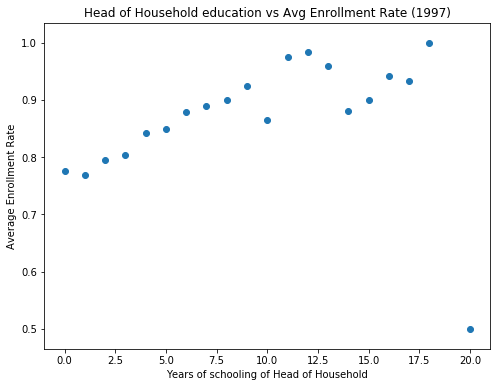

In [6]:
#Filtering data for year 97
data_97 = data[data.year==97]

#Levels of household head education
hohedu_levels = data_97.hohedu.unique()

#Calculating mean of enrollment rate for each level
result1=[]
for level in hohedu_levels:
    avg_enrollment = np.mean(data_97[data_97.hohedu==level]['sc'])
    req=level,avg_enrollment
    result1.append(req)

result1=pd.DataFrame(result1,columns=["Household_head_education_level","Avg_Enrollment_Rate"])
    
#Plotting the results
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.scatter(result1.Household_head_education_level,result1.Avg_Enrollment_Rate)
ax.set_xlabel('Years of schooling of Head of Household')
ax.set_ylabel('Average Enrollment Rate')
ax.set_title("Head of Household education vs Avg Enrollment Rate (1997)");

There seems to be a **positive correlation** between head of the household's education years and the avg enrollment rate. As the number of years of schooling for the head of the household increases, there is an overall increase in the enrollment rate apart from on **outlier** at the end. At 20 years of head of household schooling, there is a dip, where average enrollment rate seems to be the lowest. 

### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

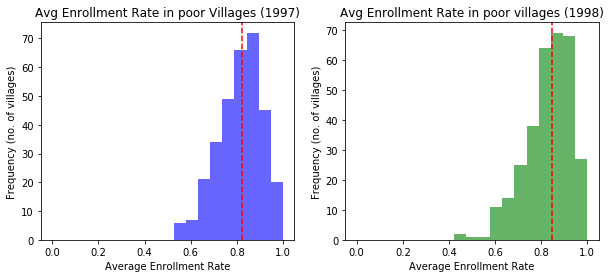

In [7]:
#Filtering the Data
treatment_97 = data[(data.year==97) & (data.poor==1) & (data.progresa==1)]
treatment_98 = data[(data.year==98) & (data.poor==1) & (data.progresa==1)]

#Unique villages
village_id_list = treatment_97['village'].unique()

#Calculate Average enrollment Rate
village_avg_enrolled_97=[]
village_avg_enrolled_98=[]

for village_id in village_id_list:
    avg_enrollment_97 = np.mean(treatment_97[treatment_97.village==village_id]['sc'])
    avg_enrollment_98 = np.mean(treatment_98[treatment_98.village==village_id]['sc'])
    village_avg_enrolled_97.append([village_id,avg_enrollment_97])
    village_avg_enrolled_98.append([village_id,avg_enrollment_98])

village_avg_enrolled_97=pd.DataFrame(village_avg_enrolled_97,columns=["Village","Avg_Enrollment_Rate"])
village_avg_enrolled_98=pd.DataFrame(village_avg_enrolled_98,columns=["Village","Avg_Enrollment_Rate"])
        
#Plotting the results
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,2,1) 
ax2 = plt.subplot(1,2,2)

# make sure bins are consistent between histograms
bins = np.linspace(0,1,20)

ax1.hist(village_avg_enrolled_97.Avg_Enrollment_Rate, bins=bins, color='blue',alpha=0.6)
ax1.axvline(np.mean(treatment_97['sc']), c='red', ls='--')
ax1.set_xlabel('Average Enrollment Rate')
ax1.set_ylabel('Frequency (no. of villages)')
ax1.set_title("Avg Enrollment Rate in poor Villages (1997)");

ax2.hist(village_avg_enrolled_98.Avg_Enrollment_Rate, bins=bins, color='green',alpha=0.6)
ax2.axvline(np.mean(treatment_98['sc']), c='red', ls='--')
ax2.set_xlabel('Average Enrollment Rate')
ax2.set_ylabel('Frequency (no. of villages)')
ax2.set_title("Avg Enrollment Rate in poor villages (1998)");

In [8]:
print("Average Enrollement Rate in 1997")
print(np.mean(treatment_97['sc']))
print()
print("Average Enrollement Rate in 1998")
print(np.mean(treatment_98['sc']))

Average Enrollement Rate in 1997
0.8226968874033842

Average Enrollement Rate in 1998
0.8464791213954308


In [9]:
stats.ttest_ind(village_avg_enrolled_97.Avg_Enrollment_Rate,village_avg_enrolled_98.Avg_Enrollment_Rate,equal_var=False,nan_policy="omit")

Ttest_indResult(statistic=-2.0157134865155815, pvalue=0.044249343422594324)

There appears to be small difference between the average enrollment rate in poor villages in 1997 (0.82) and 1998 (0.85). Based on the p-value from the t-test above, this difference appears to be statistically significant at 5% significance level.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [10]:
#Filter the data
control_98 = data[(data.year==98) & (data.poor==1) & (data.progresa==0)]
treatment_98 = data[(data.year==98) & (data.poor==1) & (data.progresa==1)]

#Unique villages
village_id_list_c = control_98['village'].unique()
village_id_list_t = treatment_98['village'].unique()

#Calculate Average enrollment Rate in villages
control_avg_enrolled_=[]
treatment_avg_enrolled=[]
    
for village_id in village_id_list_c:
    avg_enrollment = np.mean(control_98[control_98.village==village_id]['sc'])
    control_avg_enrolled_.append([village_id,avg_enrollment])
    
for village_id in village_id_list_t:
    avg_enrollment = np.mean(treatment_98[treatment_98.village==village_id]['sc'])
    treatment_avg_enrolled.append([village_id,avg_enrollment])

control_avg_enrolled_=pd.DataFrame(control_avg_enrolled_,columns=["Village","Avg_Enrollment_Rate"])
treatment_avg_enrolled=pd.DataFrame(treatment_avg_enrolled,columns=["Village","Avg_Enrollment_Rate"])
        
#t-test
stat,pvalue=stats.ttest_ind(treatment_avg_enrolled.Avg_Enrollment_Rate,control_avg_enrolled_.Avg_Enrollment_Rate,equal_var=False)
print("t-test")
print(stat,pvalue)
print()

print("Average Enrollment in treatment")
print(np.mean(treatment_98.sc))
print()
print("Average Enrollment in control")
print(np.mean(control_98.sc))
print()
print("Difference in avg values")
print(np.mean(treatment_98.sc)-np.mean(control_98.sc))

t-test
2.5286761113653253 0.011846703733412123

Average Enrollment in treatment
0.8464791213954308

Average Enrollment in control
0.807636956730308

Difference in avg values
0.0388421646651228


Looking at the p-value, the difference between treatment and control group in 1998 seems statistically significant at the significance level of 5%. This would mean that poor people who were given treatment via the Progresa program, had higher average enrollment rate than the control group. 

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [11]:
#Filtering the required data
data98 = data[(data.year==98) & (data.poor==1)]

# Regressing against the treatment/control assignment (i.e. progresa column)
model1 = smf.ols("sc ~ progresa", data = data98).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           6.64e-17
Time:                        22:46:25   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

1. The coefficient of progresa is 0.039 which represents that the average increase in the likelihood of enrollment of a child is 3.9%. In other words, in 1998, progresa increased the chances of child enrollement in school by 4.8% (0.039/0.81 = 0.0481)

2. t-test estimate from 2.1 and regression estimagte are the same. **t-estimate from 2.1: 0.039** and  **Regression estimate: 0.039**
 
3. Since the p-value is 0.000 (less than 0.05). At 5% significance level, we can reject the null hypothesis that the treatment effects are zero. 

4. Counterfactual Assumption: In the absence of the treatment, in the year 1998, there would be no difference in the enrollment rate in the two groups i.e., the outcome on the treatment and control group of running the progresa program would have been the same. 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [12]:
#regression with control variables
model2 = smf.ols(formula = "sc ~ progresa + sex +indig +dist_sec + min_dist + dist_cap + hohedu + hohwag + welfare_index + age", data = data98).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:46:25   Log-Likelihood:                -7543.3
No. Observations:               27267   AIC:                         1.511e+04
Df Residuals:                   27256   BIC:                         1.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4488      0.015     97.582

* There is a slight decrease in the point estimate of the progresa coefficient (from 0.039 to 0.033) 
* There is a slight decrease in the standard error of the treatment coefficient as well. (from  0.005 to 0.004)
* There is a very small difference in the estimates in 2.2 and 2.3, that represents that while controlling for other variables, the outcome of the treatment is similar which makes sense because treatment and control group without the treatment effect should be similar to each other. 

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [13]:
#Difference in Difference

#Filter the data
control_97 = data[(data.year==97) & (data.poor==1) & (data.progresa==0)]
treatment_97 = data[(data.year==97) & (data.poor==1) & (data.progresa==1)]
control_98 = data[(data.year==98) & (data.poor==1) & (data.progresa==0)]
treatment_98 = data[(data.year==98) & (data.poor==1) & (data.progresa==1)]

a=np.mean(control_97['sc'])
b=np.mean(control_98['sc'])
c=np.mean(treatment_97['sc'])
d=np.mean(treatment_98['sc'])

did_estimate=(d-c)-(b-a)
did_estimate

0.031331280319323085

* The estimate of the impact is 0.031, which is slightly smaller than the simple difference calculated earlier (0.039). 
* Counterfactual Assumption: In the absence of the treatment, the trend change over time (from 1997 to 1998) would have been same in the treatment and the control group, i.e., the effect on enrollment would have been same on the treatment and control group from pre to post period.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [14]:
data_poor= data[data.poor==1]

#Regression for Difference in Difference (include binary variable for 1997 and 1998)

model3 = smf.ols("sc ~ progresa * C(year) + sex + indig + dist_sec + hohedu + welfare_index + age",
                 data = data_poor).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2488.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:46:26   Log-Likelihood:                -16656.
No. Observations:               58013   AIC:                         3.333e+04
Df Residuals:                   58003   BIC:                         3.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

* The coefficient of the treatment variable (progresa) is 0.004, which represents the estimated mean difference in the enrollment rate between the treatment and control groups prior to the intervention. So, this is the baseline difference that exists between the two groups before the intervention.

* Coefficient of year is 0.0278 which represents the expected mean change in the outcome of enrollment rate from 1997 to 1998 among the control group. This is the pure effect due to the change in period from 1997 to 1998 in the absence of the treatment.

* Coefficient of progresa:C(year) is 0.0309 which represents the difference in differences estimator. It represents the  the expected mean change in outcome (enrollment rate) from 1997 to 1998 between the treatment and the control group. This is the actual effect of the intervention on the treatment group in 1998.

* The estimated mean difference in the outcome (enrollment rate) between the treatment and control groups after the intervention (in 1998) would be given the adding the coefficient of treatment variable (0.004) + coefficient of progresa:C(year)(0.0309).

* The actual effect of the treatment after intervention is 0.0309 which is different from what we got with simple difference (0.039)

* The Difference-in-difference estimator that we got here is 0.0309 with standard error of 0.006 is comparable to the estimate we got in 2.4 (0.031). The difference might be from the presence of the control variables which are not completely similar in the treatment and control group. 

* Counterfactual Assumption: The most important assumption is the parallel trend assumption, that is, the difference in the outcome of enrollment rate in the treatment and the control group would have been same with the passage of time (from 1997 to 1998)

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [15]:
data_notpoor= data[data.poor==0]

#Regression for Difference in Difference (include binary variable for 1997 and 1998)

model4 = smf.ols("sc ~ progresa * C(year) + sex + indig + dist_sec + hohedu + welfare_index + age",
                 data = data_notpoor).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     453.6
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:46:26   Log-Likelihood:                -3675.3
No. Observations:               10334   AIC:                             7371.
Df Residuals:                   10324   BIC:                             7443.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

* Looking at the model summary above, the difference-in-difference estimator (coefficient of progresa:C(year)[T.98]) is -0.0019 with p-value of 0.893 which is statsitically not significant. We would fail to reject the null hypothesis which would mean the treatment effect of progresa program on the non-poor population is zero.

* Since the eligibility of the progresa was based on welfare index, one of the reasons for the spilover could be that the non-poor household would have tried to move themselves below the welfare index by showing less of their assets in order to become eligible for PROGRESA and attain its benefits, thus affecting the overall experimental design.
    
* The other reason could be that as a result of Progresa, the enrollment in smaller schools may increase a lot resulting in crowding which can discourage non-poor households to send their children to those school as the quality of education may deteriorate because of this over-crowding. 

* The other reason could be that because of eligible household getting more money would increase their affordability, that could increase the demand and prices of the goods in the society. This could make the non-poor households focus more on the business thus getting their children out of the school (dropping the enrollment rate). 

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

* Based on the analysis done above, I feel that PROGRESA did have a causal impact on the enrollment rates of the poor households.

* Another way to investigate this hypothesis further: one can follow regression discontinuity (non-experimental) approach to further investigate the causal impact of PROGRESA. The poverty index /welfare index could be used as the running variable for measuring the impact of the treatment provided, so in the vicinity of the threshold which separate poor from non-poor, one could see if there is a discontinuity in the average enrollment rates giving evidence in favour of the causal impact.

* Counterfactual Assumption: The other variables apart from the welfare index (running variable) should not be affecting the enrollment rate at the threshold level of eligible/not eligible households. The welfare index should not be manipulated to incorporate some specific households and should be properly specified.